In [ ]:
from ib_insync import IB, util
from ib_insync.contract import Future, ContFuture
from ib_insync.client import Client
import datetime

In [45]:
util.startLoop()

ib = IB()
ib.connect('127.0.0.1', 4002, clientId=10)

<IB connected to 127.0.0.1:4002 clientId=10>

In [32]:
test_nq = Future('',
                )

In [33]:
util.df(ib.reqContractDetails(test_nq))

Error 200, reqId 125: No security definition has been found for the request, contract: Future(symbol='2EU')


In [49]:
nq = Future(symbol = 'cl',
                lastTradeDateOrContractMonth = '201909',

                currency = 'USD')

In [50]:
nq

Future(symbol='cl', lastTradeDateOrContractMonth='201909', currency='USD')

In [51]:
util.df(ib.reqContractDetails(nq)).to_dict()

{'contract': {0: Contract(secType='FUT', conId=350347435, symbol='CL', lastTradeDateOrContractMonth='20190920', multiplier='100', exchange='ONE', currency='USD', localSymbol='CL1DU9', tradingClass='CL1D'),
  1: Contract(secType='FUT', conId=376835437, symbol='CL', lastTradeDateOrContractMonth='20190906', multiplier='100', exchange='ONE', currency='USD', localSymbol='CL1IU9', tradingClass='CL1I'),
  2: Contract(secType='FUT', conId=378613217, symbol='CL', lastTradeDateOrContractMonth='20190913', multiplier='100', exchange='ONE', currency='USD', localSymbol='CL1JU9', tradingClass='CL1J'),
  3: Contract(secType='FUT', conId=380796492, symbol='CL', lastTradeDateOrContractMonth='20190927', multiplier='100', exchange='ONE', currency='USD', localSymbol='CL1KU9', tradingClass='CL1K'),
  4: Contract(secType='FUT', conId=381500807, symbol='CL', lastTradeDateOrContractMonth='20190906', multiplier='100', exchange='ONE', currency='USD', localSymbol='CL1FU9', tradingClass='CL1F'),
  5: Contract(secT

In [15]:
hist_data = ib.reqHistoricalData(nq_cont,
                            endDateTime=datetime.datetime.today(),
                            durationStr='10 D',
                            barSizeSetting='1 min',
                            whatToShow='TRADES',
                            useRTH=False,
                            formatDate=1
                            )

Error 162, reqId 32: Historical Market Data Service error message:Trading TWS session is connected from a different IP address, contract: ContFuture(symbol='NQ', exchange='GLOBEX')


In [4]:
util.df(hist_data).head()

NameError: name 'hist_data' is not defined

In [8]:
ticks = ib.reqHistoricalTicks(eurusd, start, end, 1000, 'BID_ASK', useRth=False)

NameError: name 'eurusd' is not defined

In [9]:
hist_ticks = ib.reqHistoricalTicks(nq,
                                   startDateTime='', 
                                   endDateTime=datetime.datetime.today(),
                                   whatToShow='TRADES',
                                   numberOfTicks=1000,
                                   useRth=False
                                  )

In [21]:
dt = ''
barsList = []
while True:
    bars = ib.reqHistoricalData(nq_cont,
                            endDateTime=dt,
                            durationStr='10 D',
                            barSizeSetting='1 min',
                            whatToShow='TRADES',
                            useRTH=False,
                            formatDate=1
                            )
    if not bars:
        break
    barsList.append(bars)
    dt = bars[0].date - datetime.timedelta(minutes=1)
    print(dt)

allBars = [b for bars in reversed(barsList) for b in bars]
df = util.df(allBars)

Error 200, reqId 119: No security definition has been found for the request, contract: ContFuture(symbol='EC', exchange='GLOBEX')


In [6]:
df.date = df.date.astype('datetime64')
df.set_index('date', inplace=True)
df.head()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2016-10-28 19:26:00,2106.5,2106.5,2106.5,2106.5,5,2106.5,1
2016-10-28 19:27:00,2106.5,2106.5,2106.5,2106.5,0,2106.5,0
2016-10-28 19:28:00,2106.5,2106.5,2106.5,2106.5,0,2106.5,0
2016-10-28 19:29:00,2106.5,2106.5,2106.5,2106.5,0,2106.5,0
2016-10-28 19:30:00,2106.5,2106.5,2106.5,2106.5,0,2106.5,0


In [7]:
df.to_pickle('minute_ES_cont_non_active_included.pickle')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209781 entries, 2018-10-22 05:00:00 to 2019-09-04 11:02:00
Data columns (total 7 columns):
open        209781 non-null float64
high        209781 non-null float64
low         209781 non-null float64
close       209781 non-null float64
volume      209781 non-null int64
average     209781 non-null float64
barCount    209781 non-null int64
dtypes: float64(5), int64(2)
memory usage: 12.8 MB


In [ ]:
util.barplot(allBars);

In [12]:
dt = ''
bars = ib.reqHistoricalData(nq,
                            endDateTime=dt,
                            durationStr='100 D',
                            barSizeSetting='1 day',
                            whatToShow='TRADES',
                            useRTH=False,
                            formatDate=1
                            )

In [20]:
nq_cont = ContFuture('EC', 'GLOBEX')

In [4]:
es_cont = ContFuture('ES', 'GLOBEX')

In [21]:
hist_cont = ib.reqHistoricalData(nq_cont,
                            endDateTime=datetime.datetime.today(),
                            durationStr='364 D',
                            barSizeSetting='1 day',
                            whatToShow='TRADES',
                            useRTH=True,
                            formatDate=1
                            )

In [25]:
cont_df = util.df(hist_cont)
cont_df['date'] = cont_df.date.astype('datetime64')
cont_df.set_index('date', inplace=True)
cont_df.head()

,open,high,low,close,volume,average,barCount
date,,,,,,,
2018-08-07,7577.500,7598.500,7561.750,7588.875,225673,7581.751720,127051
2018-08-08,7574.625,7607.875,7553.625,7583.000,213271,7585.608446,112455
2018-08-09,7588.375,7617.500,7576.125,7587.125,203502,7599.449524,106385
2018-08-10,7534.625,7557.875,7501.125,7537.875,319684,7534.963549,157961
2018-08-13,7541.625,7590.625,7516.750,7527.750,310911,7547.637460,161906


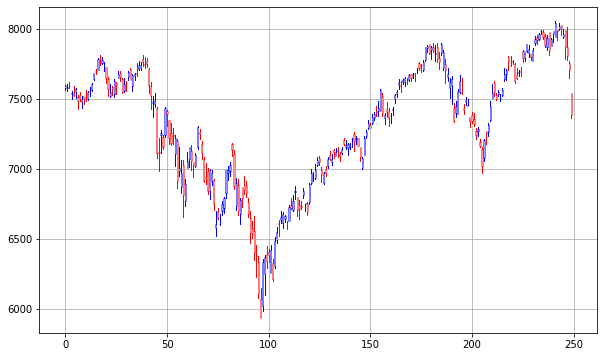

Peer closed connection


In [29]:
util.barplot(hist_cont);

In [6]:
ib.disconnect()